In [12]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('../archivos/ABCcorporation2024.csv', index_col=[0])
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,52,no,non-travel,2015.722222,NaN,6,3,NaN,1,1,M,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,NaN,15,15,1972,195370.00,NaN,NaN
1,53,no,non-travel,2063.388889,NaN,1,4,life sciences,2,3,M,NaN,2,5,manager,3,NaN,16665.83,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,1971,199990.00,NaN,si
2,43,no,travel_rarely,1984.253968,research & development,4,2,technical degree,3,3,M,NaN,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,1981,192320.00,manager - research & development,si
3,48,no,travel_rarely,1771.404762,NaN,2,4,medical,4,1,F,NaN,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,full time,2,NaN,2,NaN,20,NaN,5,6,1976,171690.00,NaN,NaN
4,47,no,non-travel,1582.771346,NaN,3,3,technical degree,5,1,F,NaN,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,1977,153407.04,NaN,no


In [14]:
# Informacion general 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   dailyrate                 1614 non-null   float64
 4   department                302 non-null    object 
 5   distancefromhome          1614 non-null   int64  
 6   education                 1614 non-null   int64  
 7   educationfield            869 non-null    object 
 8   employeenumber            1614 non-null   int64  
 9   environmentsatisfaction   1614 non-null   int64  
 10  gender                    1614 non-null   object 
 11  hourlyrate                404 non-null    float64
 12  jobinvolvement            1614 non-null   int64  
 13  joblevel                  1614 non-null   int64  
 14  jobrole      

In [15]:
# Nulos
nulos= df.isnull().sum()

# % Nulos
print(f'% Nulos: {(nulos/df.shape[0]*100).round(2)}')

% Nulos: age                          0.00
attrition                    0.00
businesstravel               0.00
dailyrate                    0.00
department                  81.29
distancefromhome             0.00
education                    0.00
educationfield              46.16
employeenumber               0.00
environmentsatisfaction      0.00
gender                       0.00
hourlyrate                  74.97
jobinvolvement               0.00
joblevel                     0.00
jobrole                      0.00
jobsatisfaction              0.00
maritalstatus               40.33
monthlyincome                0.00
monthlyrate                  0.00
numcompaniesworked           0.00
overtime                    41.88
percentsalaryhike            0.00
performancerating           12.08
relationshipsatisfaction     0.00
standardhours               20.94
stockoptionlevel             0.00
totalworkingyears           32.59
trainingtimeslastyear        0.00
worklifebalance              6.69
years

In [16]:
# principales estadisticos var numericas 
display(df.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
age,1614.0,37.92,9.10,19.00,31.00,37.00,44.00,61.00
dailyrate,1614.0,669.63,472.35,104.10,290.04,556.26,967.31,2063.39
distancefromhome,1614.0,11.14,10.45,1.00,2.00,8.00,17.00,49.00
education,1614.0,2.93,1.02,1.00,2.00,3.00,4.00,5.00
employeenumber,1614.0,807.50,466.07,1.00,404.25,807.50,1210.75,1614.00
environmentsatisfaction,1614.0,2.69,1.11,1.00,2.00,3.00,4.00,4.00
hourlyrate,404.0,83.04,57.55,13.01,36.25,69.53,114.16,255.96
jobinvolvement,1614.0,2.74,0.71,1.00,2.00,3.00,3.00,4.00
joblevel,1614.0,2.07,1.10,1.00,1.00,2.00,3.00,5.00
jobsatisfaction,1614.0,2.74,1.11,1.00,2.00,3.00,4.00,4.00


In [17]:
# principales estadisticos var categoricas
display(df.describe(include = "object").T.round(2))

,count,unique,top,freq
attrition,1614,2,no,1355
businesstravel,1614,3,non-travel,863
department,302,3,research & development,196
educationfield,869,6,life sciences,349
gender,1614,2,M,971
jobrole,1614,9,sales executive,369
maritalstatus,963,3,married,439
overtime,938,2,no,682
standardhours,1276,2,part time,888
roledepartament,302,11,sales executive - sales,69


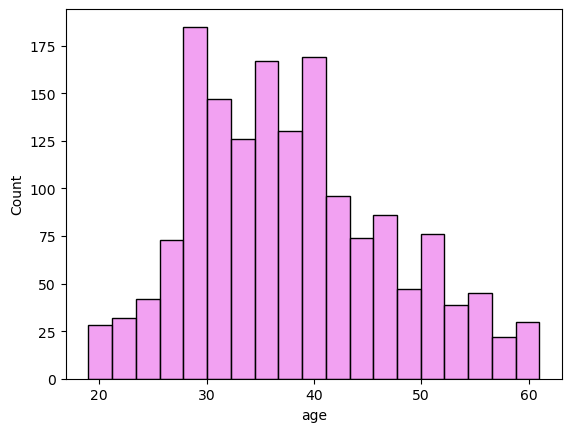

In [56]:
sns.histplot(x = "age", data = df, color = "violet");

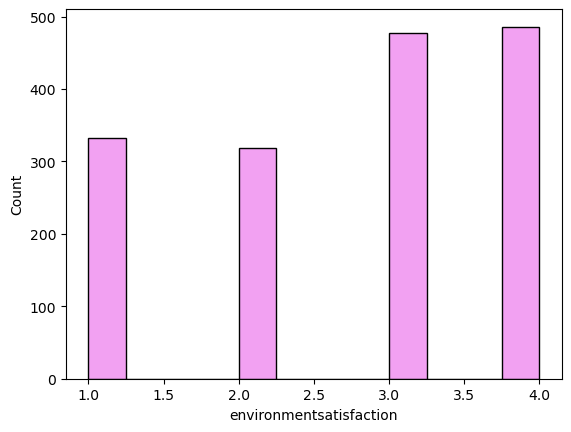

In [114]:
sns.histplot(x = "environmentsatisfaction", data = df, color = "violet");


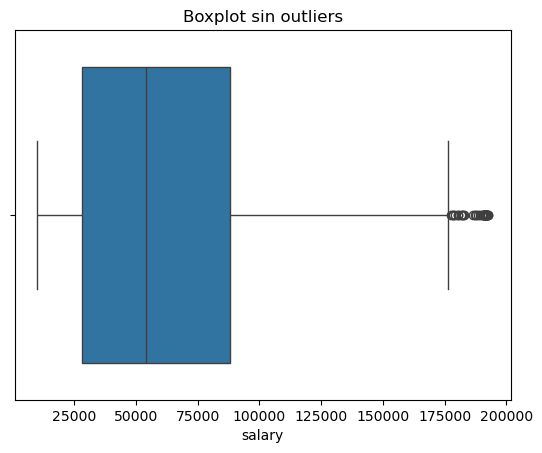

In [63]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Excluir outliers
filtered_df = df[(df['salary'] >= lower_limit) & (df['salary'] <= upper_limit)]

# Mostrar boxplot sin outliers
sns.boxplot(data=filtered_df, x='salary')
plt.title("Boxplot sin outliers")
plt.show()

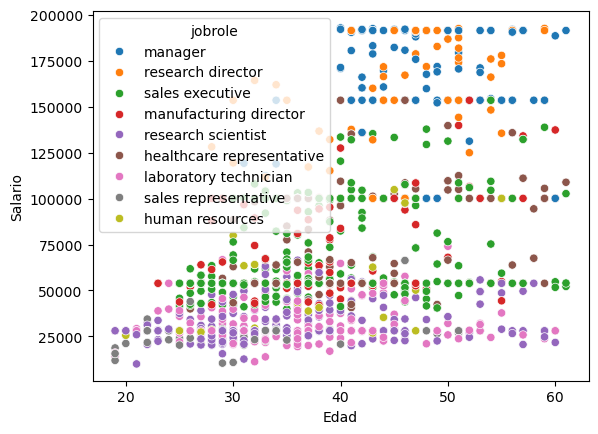

In [66]:
sns.scatterplot(x = "age", 
                y = "salary",
                hue= 'jobrole', 
                data = filtered_df)

# cambiamos los nombres de los ejes
plt.xlabel("Edad")
plt.ylabel("Salario");

Text(0.5, 1.0, 'Relación entre distancia y puntos acumulados')

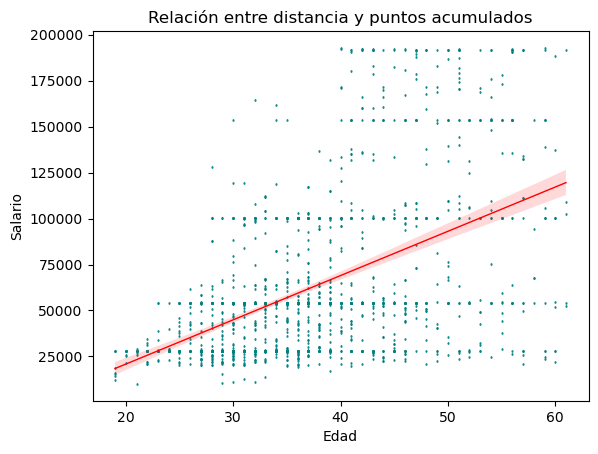

In [67]:
# Calculamos el grafico
sns.regplot(x = "age", 
            y = "salary", 
            data = filtered_df, 
            marker = "d", 
            line_kws = {"color": "red", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 0.80} # cambiamos el color y el tamaño de los puntos del scaterplot
            )
# nombres de los ejes 
plt.xlabel("Edad")
plt.ylabel("Salario")
# ponemos título a la gráfica
plt.title("Relación entre distancia y puntos acumulados")

In [69]:
correlation = df['age'].corr(df['salary']).round(2)
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.42


In [128]:
df_jobrole = df[['jobrole', 'attrition', 'employeenumber']].sort_values(by='employeenumber', ascending=False)

In [129]:
df_jobrole

,jobrole,attrition,employeenumber
1613,manufacturing director,no,1614
1612,sales executive,no,1613
1611,sales executive,no,1612
1610,laboratory technician,no,1611
1609,sales executive,yes,1610
...,...,...,...
4,sales executive,no,5
3,research director,no,4
2,manager,no,3
1,manager,no,2


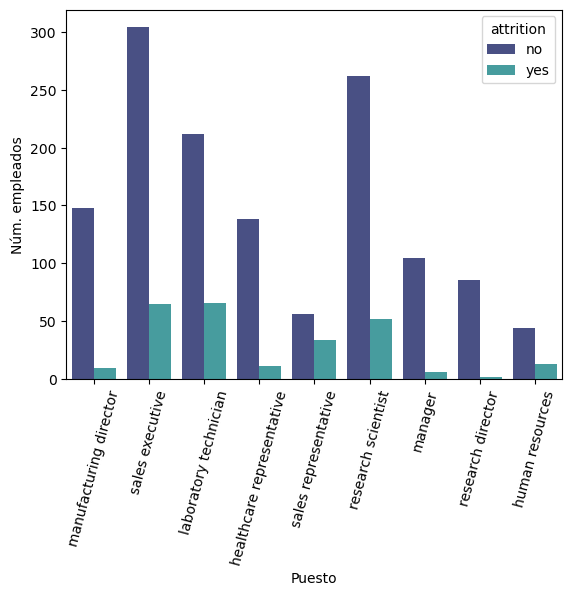

In [130]:
sns.countplot(x = "jobrole", 
              data = df_jobrole, 
              palette = "mako", 
              hue = "attrition")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 75)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Puesto")
plt.ylabel("Núm. empleados"); 

Hacer tablas de porcentajes por cada puesto, según attrition.

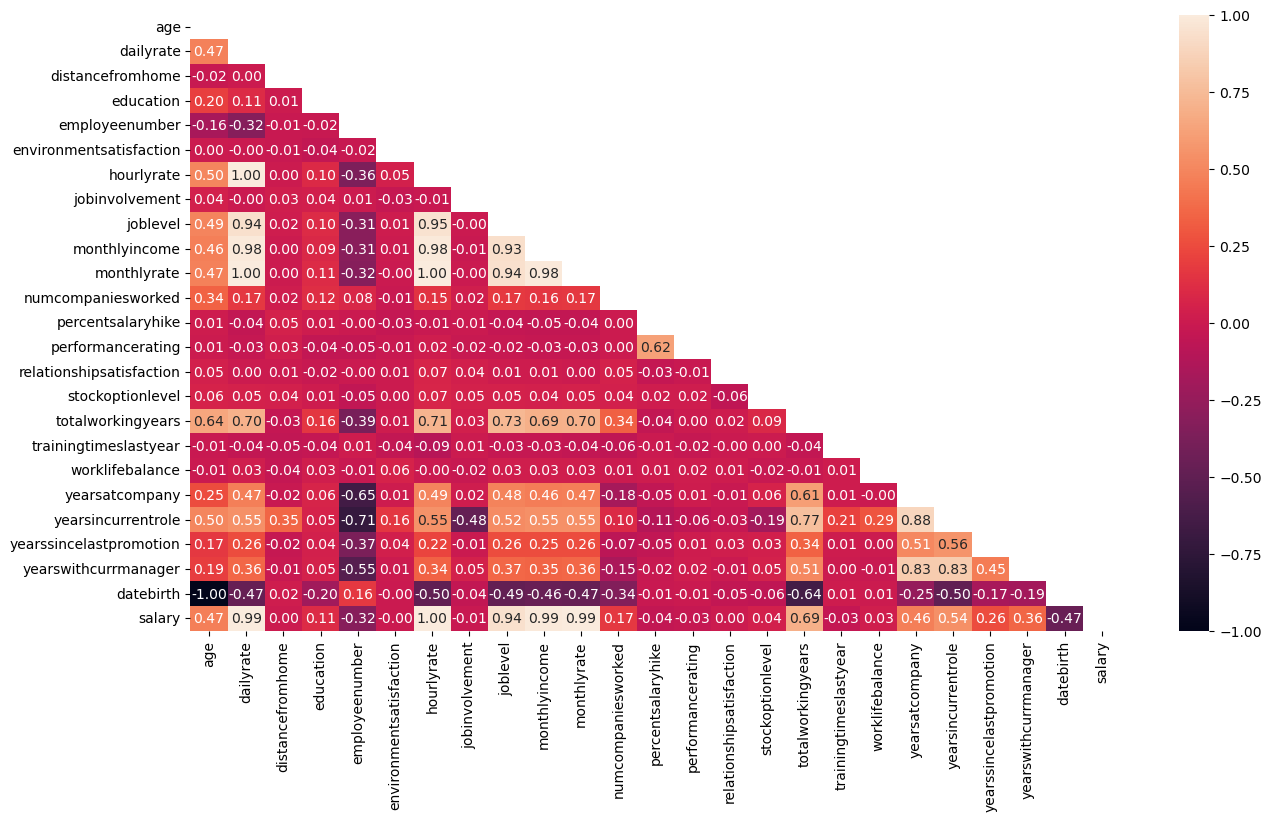

In [111]:
matriz_corr = df.select_dtypes(exclude=object).corr("spearman")
mascara= np.triu(np.ones_like(matriz_corr, dtype= bool))
plt.figure(figsize=(15,8))
sns.heatmap(data=matriz_corr, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara);

---
# Hipótesis 1: Relación entre la satisfacción en el trabajo y la rotación de empleados ✨
- EnvironmentSatisfaction 
Ver la relacion entre ambas (lineal o no lineal) -> grafico de regresion y correlacion de pearson (lineal) o correlacion de spearman (no lineal) para cuantificar la relación entre ambas

In [20]:
df['jobsatisfaction'] = df['jobsatisfaction'].astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   dailyrate                 1614 non-null   float64
 4   department                302 non-null    object 
 5   distancefromhome          1614 non-null   int64  
 6   education                 1614 non-null   int64  
 7   educationfield            869 non-null    object 
 8   employeenumber            1614 non-null   int64  
 9   environmentsatisfaction   1614 non-null   int64  
 10  gender                    1614 non-null   object 
 11  hourlyrate                404 non-null    float64
 12  jobinvolvement            1614 non-null   int64  
 13  joblevel                  1614 non-null   int64  
 14  jobrole      

In [26]:
df2 = df[['jobsatisfaction', 'attrition']].sort_values(by= 'jobsatisfaction', ascending=False)

<Axes: xlabel='attrition', ylabel='jobsatisfaction'>

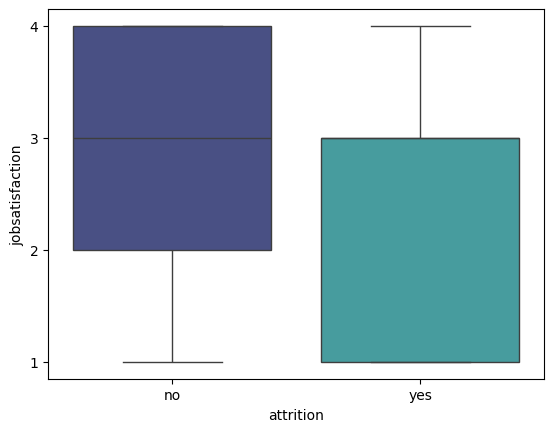

In [32]:
sns.boxplot(x = "attrition",
            y = "jobsatisfaction", 
            data = df2, 
            palette= "mako")

# Hipótesis 4: Relación entre la edad/genero-la rotación de empleados ✨
Ver distribucion de la rotacion de empleados por genero e incluir la edad


In [38]:
df3 = df[['age', 'gender', 'attrition']]

In [90]:
df['Rango edad'] = df['age'].apply(lambda x: 'Menor 38' if x<38 else 'Mayor 38')

In [85]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework,Rango edad
0,52,no,non-travel,2015.722222,NaN,6,3,NaN,1,1,M,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,NaN,15,15,1972,195370.00,NaN,NaN,Mayor 30
1,53,no,non-travel,2063.388889,NaN,1,4,life sciences,2,3,M,NaN,2,5,manager,3,NaN,16665.83,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,1971,199990.00,NaN,si,Mayor 30
2,43,no,travel_rarely,1984.253968,research & development,4,2,technical degree,3,3,M,NaN,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,1981,192320.00,manager - research & development,si,Mayor 30
3,48,no,travel_rarely,1771.404762,NaN,2,4,medical,4,1,F,NaN,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,full time,2,NaN,2,NaN,20,NaN,5,6,1976,171690.00,NaN,NaN,Mayor 30
4,47,no,non-travel,1582.771346,NaN,3,3,technical degree,5,1,F,NaN,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,1977,153407.04,NaN,no,Mayor 30


In [91]:
df4 = df.groupby(['Rango edad', 'attrition'])['employeenumber'].count().reset_index()

In [92]:
df4

,Rango edad,attrition,employeenumber
0,Mayor 38,no,660
1,Mayor 38,yes,79
2,Menor 38,no,695
3,Menor 38,yes,180


In [107]:
df_filtrado = df4[df4['attrition'] == 'yes']
df_filtrado

,Rango edad,attrition,employeenumber
1,Mayor 38,yes,79
3,Menor 38,yes,180


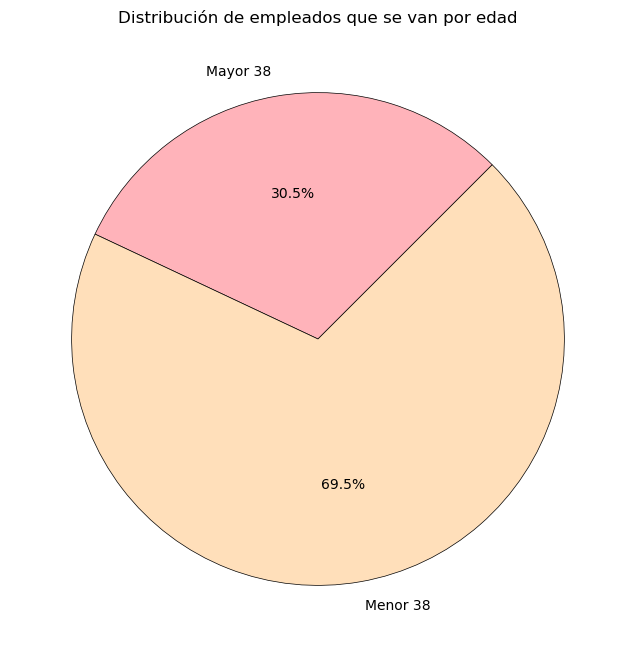

In [132]:
plt.figure(figsize=(8,8))
colors = ["#FFB3BA", 
            "#FFDFBA"] 
plt.pie("employeenumber", labels= "Rango edad",
        data = df_filtrado, 
        autopct=  '%1.1f%%', 
        colors = colors, 
        textprops={'fontsize': 10}, 
        startangle=45,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title('Distribución de empleados que se van por edad');

In [46]:
df_gender = df.groupby("gender")["employeenumber"].count().reset_index()
df_gender

,gender,employeenumber
0,F,643
1,M,971


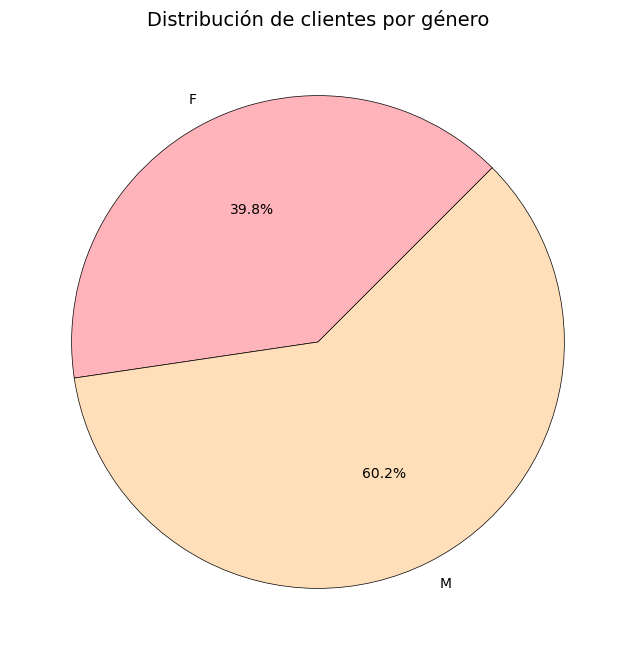

In [47]:
# Generamos el graficp con el df creado anteriormente 
plt.figure(figsize=(8,8))
colors = ["#FFB3BA", 
            "#FFDFBA"] 
plt.pie("employeenumber", labels= "gender",
        data = df_gender, 
        autopct=  '%1.1f%%', 
        colors = colors, 
        textprops={'fontsize': 10}, 
        startangle=45,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.title('Distribución de clientes por género', fontsize=14);
# Guardamos la grafica
#plt.savefig("graficos_visualizacion/distrib_clientes_provincia.jpg", bbox_inches = "tight", pad_inches=0.2);

In [53]:
df_hue = df.groupby(['gender', 'attrition'])['employeenumber'].count().reset_index()
df_hue

,gender,attrition,employeenumber
0,F,no,547
1,F,yes,96
2,M,no,808
3,M,yes,163


Text(0, 0.5, 'Cantidad vuelos reservados')

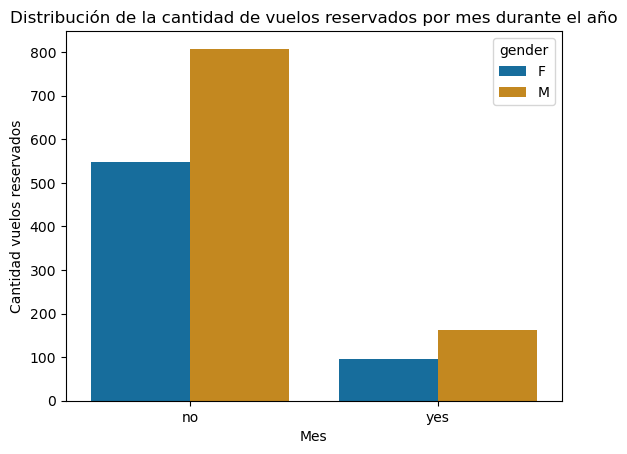

In [55]:
# Generamos grafico
sns.barplot(data=df_hue,
            x='attrition',
            y='employeenumber',
            hue='gender', # agregamos una variable categorica mas
            palette='colorblind') # Diseñada para ser accesible a personas con deficiencias de visión en los colores.
plt.title('Distribución de la cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad vuelos reservados')
# Guardamos la grafica
#plt.savefig("graficos_visualizacion/vuelos_mes_anio.jpg", bbox_inches = "tight", pad_inches=0.2);